In [2]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
df = pd.read_csv("sentimentdataset.csv")
df

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


In [ ]:
df_backup = df.copy()

In [ ]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [ ]:
arquivo = 'sentimentdataset.csv'
hashtags = pd.read_csv(arquivo, usecols=['Hashtags'])

lista_hashtags = hashtags['Hashtags'].tolist()
lista_hashtags

[' #Nature #Park                            ',
 ' #Traffic #Morning                        ',
 ' #Fitness #Workout                        ',
 ' #Travel #Adventure                       ',
 ' #Cooking #Food                           ',
 ' #Gratitude #PositiveVibes              ',
 ' #RainyDays #Cozy                         ',
 ' #MovieNight #MustWatch                  ',
 ' #Politics #Debate                       ',
 ' #Summer #BeachDays                      ',
 ' #Blogging #NewPost                      ',
 ' #SickDay #Health                        ',
 ' #CityExplore #HiddenGems                ',
 ' #NewYear #FitnessGoals                  ',
 ' #Tech #Innovation                       ',
 ' #Reflection #Future                     ',
 ' #PetAdoption #FurryFriend               ',
 ' #Gaming #LateNight                      ',
 ' #AI #TechConference                     ',
 ' #WinterBlues #Mood                      ',
 ' #Reading #CoffeeTime                    ',
 ' #VR #VirtualReality       

In [ ]:
hashtags = df['Hashtags'].dropna()

lista_hashtags = " ".join(lista_hashtags)

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(lista_hashtags)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras de Hashtags')
plt.show()

NameError: name 'WordCloud' is not defined

In [ ]:
# Padronizar o nome das plataformas para evitar duplicatas devido a diferenças de formatação
df['Platform'] = df['Platform'].str.strip().str.lower()
# Contar a frequência de cada plataforma após a padronização
platform_counts = df['Platform'].value_counts()
# Criar o gráfico de pizza atualizado
plt.figure(figsize=(8, 6))
plt.pie(platform_counts, labels=platform_counts.index.str.capitalize(), autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribuição de Acessos por Plataforma (Padronizado)')
plt.axis('equal')
plt.show()

NameError: name 'plt' is not defined

NameError: name 'plt' is not defined

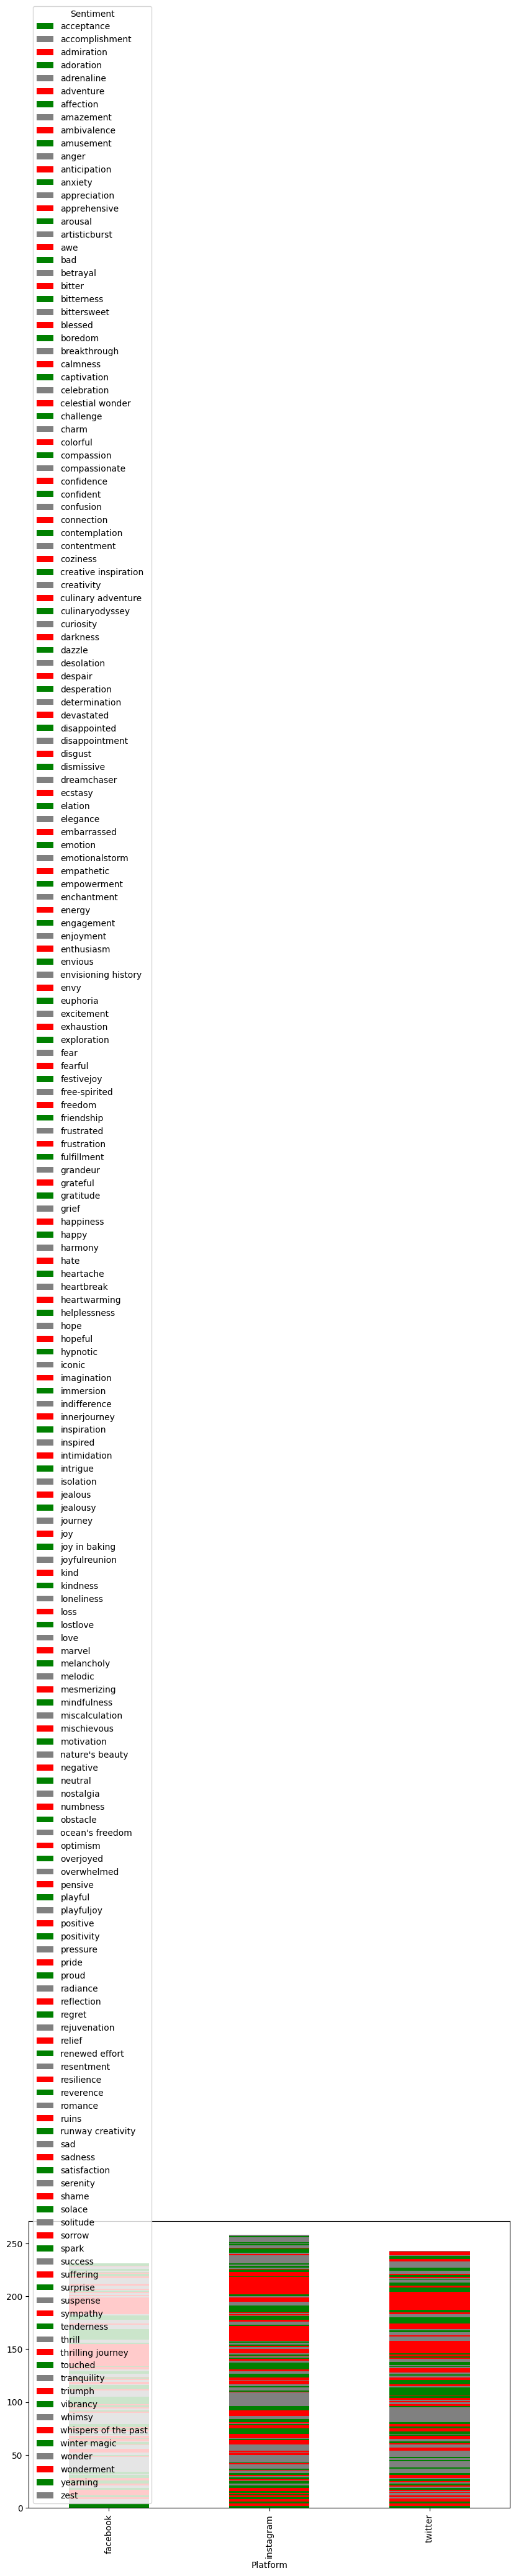

In [ ]:
# Padronizar as plataformas e os sentimentos
df['Platform'] = df['Platform'].str.strip().str.lower()
df['Sentiment'] = df['Sentiment'].str.strip().str.lower()
# Contar os sentimentos por plataforma
sentiment_platform = df.groupby(['Platform', 'Sentiment']).size().unstack(fill_value=0)
# Criar o gráfico de barras empilhadas
sentiment_platform.plot(kind='bar', stacked=True, color=['green', 'gray', 'red'], figsize=(10, 6))
plt.title('Distribuição de Sentimentos por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Número de Sentimentos')
plt.legend(['Positivo', 'Neutro', 'Negativo'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Padronizar os nomes dos países
df['Country'] = df['Country'].str.strip().str.capitalize()
# Contar o número de interações por país
country_counts = df['Country'].value_counts()
# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Distribuição de Interações por País')
plt.xlabel('País')
plt.ylabel('Número de Interações')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
# Padronizar os sentimentos
df['Sentiment'] = df['Sentiment'].str.strip().str.lower()
# Filtrar os dados para sentimentos positivos e negativos
likes_positivos = df[df['Sentiment'] == 'positive']['Likes']
likes_negativos = df[df['Sentiment'] == 'negative']['Likes']
# Executar o teste t para duas amostras independentes
t_stat, p_value = ttest_ind(likes_positivos, likes_negativos, nan_policy='omit')
# Exibir os resultados
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')
# Interpretar o resultado
alpha = 0.05
if p_value < alpha:
    print('Rejeitamos a hipótese nula')
else:
    print('Não rejeitamos a hipótese nula')

T-statistic: 1.9481079620371342
P-value: 0.05738776169647388
Não rejeitamos a hipótese nula


In [ ]:
import sqlite3
hashtags_amotras = df['Hashtags'].dropna()

conn = sqlite3.connect('hashtags.db')
hashtags_amotras.to_sql('hashtags', conn, if_exists='replace', index=False)
query_sql = 'SELECT * FROM hashtags'
df_hashtags = pd.read_sql_query(query_sql, conn)
print(df_hashtags)
conn.close()


                                          Hashtags
0        #Nature #Park                            
1        #Traffic #Morning                        
2        #Fitness #Workout                        
3        #Travel #Adventure                       
4        #Cooking #Food                           
..                                             ...
727         #ScienceFairWinner #HighSchoolScience 
728    #SurpriseCelebration #HighSchoolFriendship 
729      #CommunityGiving #HighSchoolPhilanthropy 
730         #CulturalCelebration #HighSchoolUnity 
731   #VirtualEntertainment #HighSchoolPositivity 

[732 rows x 1 columns]
